The paradigm of healthcare has been shifted from treatment to prevention. In order to prevent a medical condition, it is critical to understand which factor(s) is related to the condition. 

The primary goal of this project is to determine which predictor among the 8 given in this dataset most accurately predicts the presence of diabetes. In other words, I aim to identify the indicator that has meaningful correlation with the presence of diabetes. The secondary goal of this project is to figure out what other indicators could be possibly correlated with the key predictor. In case the key predictor is difficult or costly to obtain, this piece of knowledge could help people gauge their risk of having diabetes via more accessible measures.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
df.shape

(768, 9)

In [3]:
cols = list(df.columns)
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [4]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Outlier detection with z-score
means = []
stds = []
for col in cols[:-1]:
    means.append(np.mean(df[col].values))
    stds.append(np.std(df[col].values))

df_dropped = df
for col_idx, col in enumerate(cols[:-1]):
    df_dropped = df_dropped[(-3*stds[col_idx] <= df_dropped[col] - means[col_idx]) &
    (df_dropped[col] - means[col_idx] <= 3*stds[col_idx])]

df_dropped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


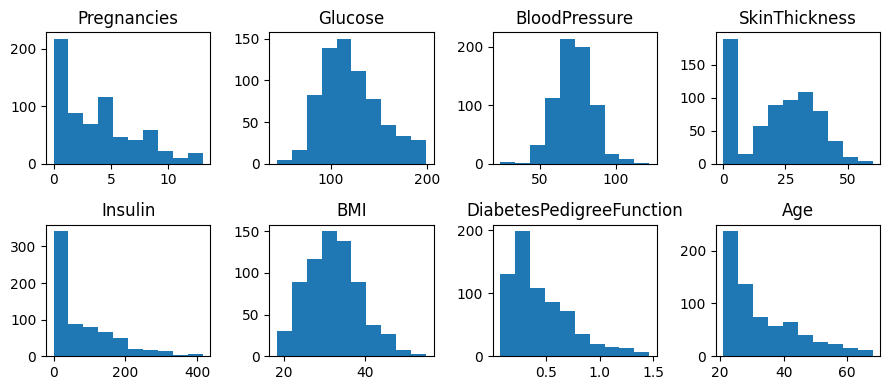

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2,4, figsize = (9,4))
for idx, ax in enumerate(axes.flat):
    ax.hist(df_dropped[cols[idx]].values, bins=10)
    ax.set_title(cols[idx])

fig.tight_layout()
plt.show()

In [8]:
#주요 변수들과 타겟의 관계 확인

#그룹별 평균 구하기

no_diabetes = df_dropped[df_dropped['Outcome'] == 0]
yes_diabetes = df_dropped[df_dropped['Outcome'] == 1]

no_diabetes_means = no_diabetes.mean(numeric_only=True)
yes_diabetes_means = yes_diabetes.mean(numeric_only=True)

print(no_diabetes_means)
print(yes_diabetes_means)

#모든 변수 간 correlation coefficient 구하기 
correlation_matrix = df_dropped.corr()
print(correlation_matrix)

Pregnancies                   3.325380
Glucose                     110.223427
BloodPressure                70.770065
SkinThickness                20.175705
Insulin                      65.553145
BMI                          30.825813
DiabetesPedigreeFunction      0.411885
Age                          31.119306
Outcome                       0.000000
dtype: float64
Pregnancies                   4.903084
Glucose                     140.744493
BloodPressure                75.546256
SkinThickness                22.030837
Insulin                      86.629956
BMI                          35.018502
DiabetesPedigreeFunction      0.541211
Age                          37.105727
Outcome                       1.000000
dtype: float64
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.156470       0.229881      -0.097721   
Glucose                      0.156470  1.000000       0.240560       0.008577   
BloodPressure            

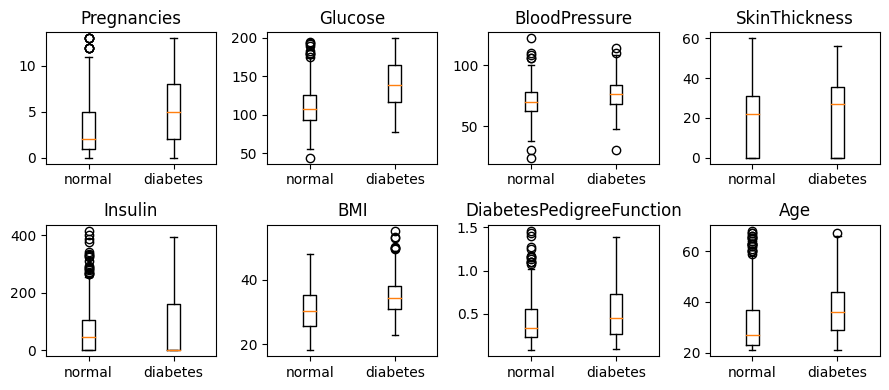

In [9]:
#boxplot
fig, axes = plt.subplots(2,4, figsize=(9,4))

for idx, ax in enumerate(axes.flatten()):
    data_to_plot = [no_diabetes[cols[idx]], yes_diabetes[cols[idx]]]
    ax.boxplot(data_to_plot, labels=['normal', 'diabetes'])
    ax.set_title(cols[idx])

fig.tight_layout()
plt.show()

In [10]:
#변수 간 관계 탐색
#수치형-수치형: 산점도, 상관계수

#glucose & pregnancies 

#glucose & DPF

#glucose & BMI

#glucose & blood pressure